In [2]:
import pandas as pd 
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('emails.csv',encoding='latin-1')
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [6]:
df1=pd.read_csv('emails2.csv')
df1.head()

,text,spam
0,Did you just reset your password? We noticed a...,0
1,Welcome to Facebook. Thank you for joining Fac...,0
2,Learn more about our updated Terms of Service....,0
3,Action needed on your Facebook account. Your F...,0
4,Sign in alert for your LinkedIn account. We de...,0


In [7]:
df2=pd.read_csv('spam1.csv')
df2.head(2)

,text,spam
0,Does Hanuman Chalisa do miracles? Has anyone w...,1
1,"[$32,500 in Prizes] Wager, Refer and win big t...",1


In [11]:
df3=pd.read_csv('inbox.csv')
df3.head(2)

,text,spam
0,Welcome to Reddit!,1
1,🚀 A Sneak Peek of What's Inside BFF,1


In [12]:
df=pd.concat([df,df1,df2,df3],axis=0)

In [13]:
df.head(2)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1


In [14]:
df.shape

(13491, 2)

In [70]:
df['spam'].unique()

array([1, 0], dtype=int64)

In [72]:
df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
21,Sign in alert for your LinkedIn account,0
22,[ZEGOCLOUD] Your trial account has expired.,0
23,[ZEGOCLOUD] Trial Account - valid period: 5 days,0
24,[ZEGOCLOUD] Your Advanced Support Plan Trial h...,0


In [73]:
df.describe()

,spam
count,5770.000000
mean,0.239861
std,0.427036
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [74]:
ham_df=df[df['spam']==0]
ham_df

,text,spam
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0
1369,Subject: sacramento weather station fyi - - ...,0
1370,Subject: from the enron india newsdesk - jan 1...,0
1371,Subject: re : powerisk 2001 - your invitation ...,0
1372,Subject: re : resco database and customer capt...,0
...,...,...
21,Sign in alert for your LinkedIn account,0
22,[ZEGOCLOUD] Your trial account has expired.,0
23,[ZEGOCLOUD] Trial Account - valid period: 5 days,0
24,[ZEGOCLOUD] Your Advanced Support Plan Trial h...,0


In [75]:
spam_df=df[df['spam']==1]
spam_df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
11,You have a new voicemail. You have received a ...,1
12,Earn $500 per day working from home. Discover ...,1
13,Limited-time offer: Get 50% off your purchase....,1
14,Unlock exclusive rewards now. As a valued cust...,1


In [76]:
print('Spam percentage = ', (len(spam_df)/len(df))*100, '%')

Spam percentage =  23.986135181975737 %


In [77]:
print('Ham percentage = ', (len(ham_df)/len(df))*100, '%')

Ham percentage =  76.01386481802427 %


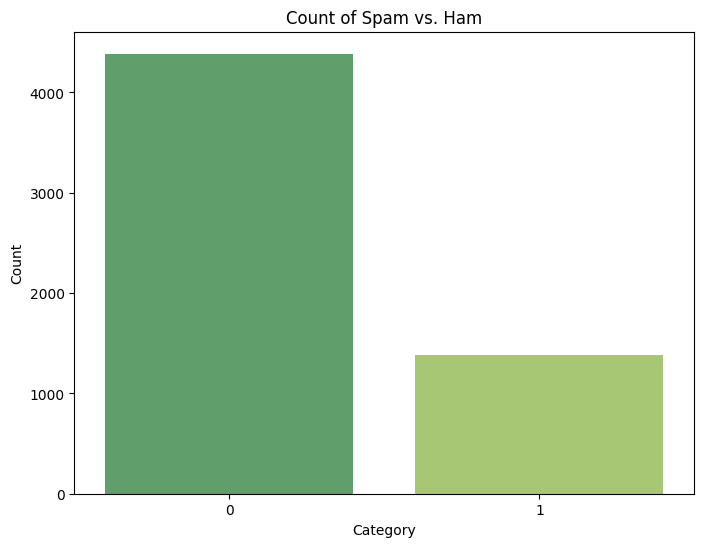

In [78]:
plt.figure(figsize=(8, 6))
sns.countplot(x='spam', hue='spam', data=df, palette='summer', legend=False)
plt.title('Count of Spam vs. Ham')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [79]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [80]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [81]:
import nltk
nltk.download('stopwords')
  

[nltk_data] Downloading package stopwords to C:\Users\Anand
[nltk_data]     Gupta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [82]:
import string
from nltk.corpus import stopwords

stopwords.words('english')
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [83]:
def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [84]:
df_clean = df['text'].apply(message_cleaning)
print(df_clean[0])

0    [Subject, naturally, irresistible, corporate, ...
0    [reset, password, noticed, recent, password, c...
0    [reset, password, noticed, recent, password, c...
Name: text, dtype: object


In [85]:
print(spam_df['text'][0])

Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  mar

In [86]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
spamham_cv = vectorizer.fit_transform(df['text'])


In [87]:
print(vectorizer.get_feature_names_out())

['00' '000' '0000' ... 'zzn' 'zzncacst' 'zzzz']


In [88]:
print(spamham_cv.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [89]:
spamham_cv.shape

(5770, 37309)

In [90]:
label = df['spam'].values
label

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [91]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(spamham_cv, label)


MultinomialNB()

In [92]:
testing_sample=['Free Money!!!',' Hi Jane, Please let me know if you want to modify our project.']
testing_sample_vectorizer = vectorizer.transform(testing_sample)

In [93]:
print(testing_sample_vectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [94]:
test_predict = NB_classifier.predict(testing_sample_vectorizer)
test_predict

array([1, 0], dtype=int64)

In [95]:
sampletwo = ['Free Money !!!','I am hungry. Let us go to eat.']
sampletwo_vectorizer= vectorizer.transform(sampletwo)

In [96]:
test_predicttwo = NB_classifier.predict(sampletwo_vectorizer)
test_predicttwo

array([1, 0], dtype=int64)

In [97]:
samplethree = ['Hello ! I am coming home.','WOW!! Shop on full discount!!']
samplethree_vectorizer = vectorizer.transform(samplethree)

In [98]:
test_predictthree = NB_classifier.predict(samplethree_vectorizer)
test_predictthree

array([0, 1], dtype=int64)

In [99]:
X=spamham_cv
y= label

In [100]:
X.shape

(5770, 37309)

In [101]:
y.shape

(5770,)

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train ,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [103]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train,y_train)

MultinomialNB()

In [104]:
from sklearn.metrics import classification_report, confusion_matrix

In [105]:
y_predict_train =NB_classifier.predict(X_train)
y_predict_train

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

<Axes: >

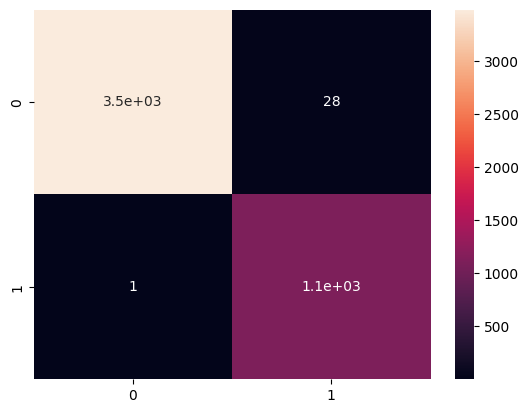

In [106]:
cm = confusion_matrix(y_train,y_predict_train)
sns.heatmap(cm,annot= True)

In [107]:
y_predict_test = NB_classifier.predict(X_test)
y_predict_test

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

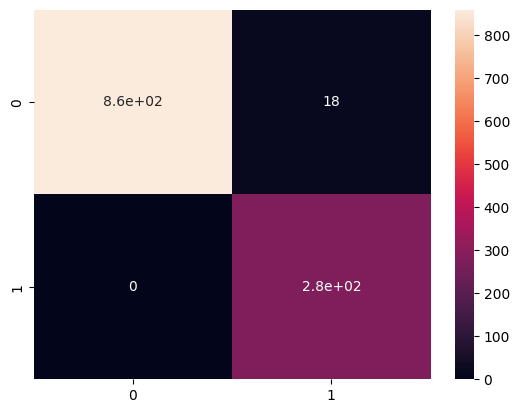

In [108]:
cm = confusion_matrix(y_test,y_predict_test)
sns.heatmap(cm,annot=True)
plt.show()

In [109]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       877
           1       0.94      1.00      0.97       277

    accuracy                           0.98      1154
   macro avg       0.97      0.99      0.98      1154
weighted avg       0.99      0.98      0.98      1154



In [110]:
import pickle

In [111]:
# Save the- model and vectorizer
with open('naive_bayes_model.pkl', 'wb') as model_file:
    pickle.dump(NB_classifier, model_file)

with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)

print("Model and vectorizer saved!")

Model and vectorizer saved!
